In [2]:
TEST_SIZE = 0.2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_precision_and_recall(precision_score_arr, recall_score_arr):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.plot(np.arange(1, 31), precision_score_arr, label="Recall")
    ax1.set_xlabel("Number of features")
    ax1.set_ylabel("Score")
    ax1.set_title("Precision scores for 30 SVM models with gaussian kernel")

    ax2.plot(np.arange(1, 31), recall_score_arr, label="Precision")
    ax2.set_xlabel("Number of features")
    ax2.set_ylabel("Score")
    ax2.set_title("Recall scores for 30 SVM models with gaussian kernel")

    plt.tight_layout()
    plt.show()

Precision: 0.9605263157894737
Recall: 0.9733333333333334
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.96      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



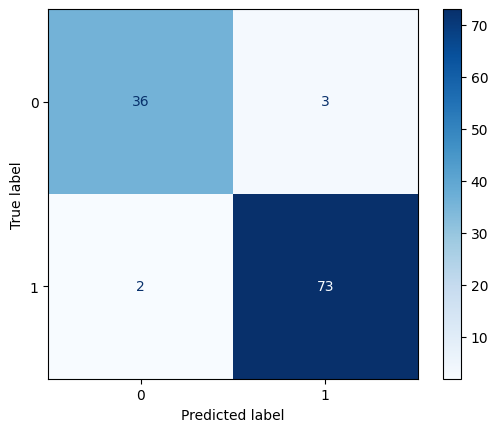

In [5]:
"""
Create a Logistic Regression (LogReg) model using all the features to perform binary classification
on this dataset. Use the code in the notebook file on eLearning for Logistic Regression as a hint.
Split the data into training and test sets and use the training set to train your model. Print the
recall and precision values on test the test set. Use the test set to plot confusion matrix as well.
(hint: SVM example on eLearning)
"""
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

X, Y = load_breast_cancer(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE)

model = LogisticRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

#Print classification report
print(classification_report(Y_test, Y_pred))

#Plot confusion matrix
disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=None)
plt.show()





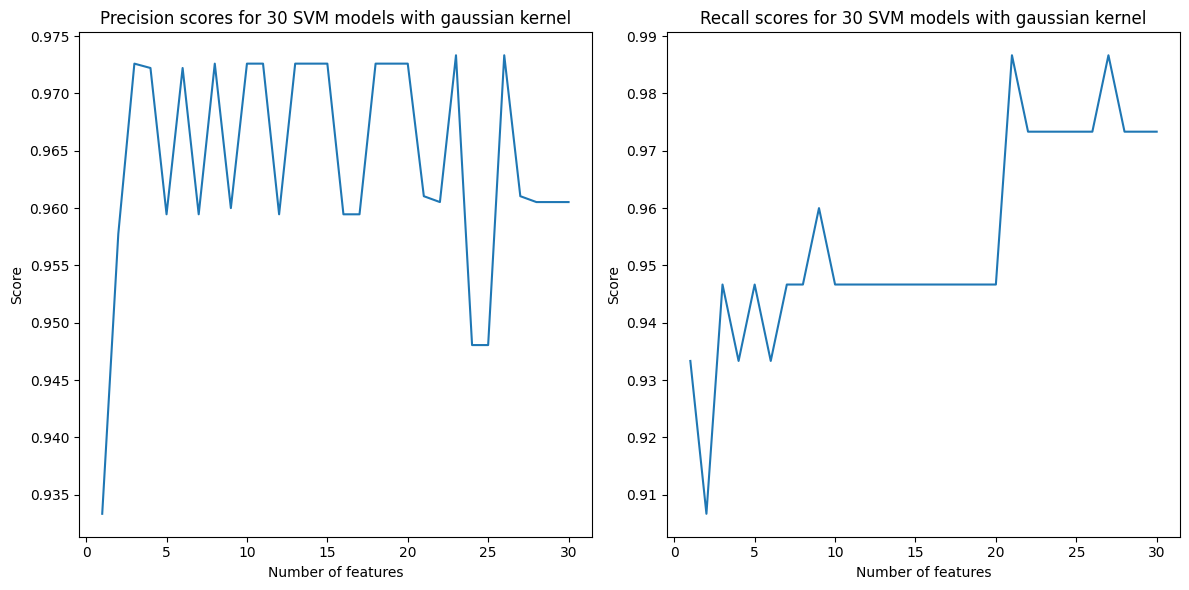

In [6]:
from rich import print
"""
Create 30 LogReg models by incrementally changing the number of features.
"""

recall_score_arr = []
precision_score_arr = []

for i in range(1, 31):
    model = LogisticRegression().fit(X_train[:, :i], Y_train)
    Y_pred = model.predict(X_test[:, :i])
    recall_score_arr.append(recall_score(Y_test, Y_pred))
    precision_score_arr.append(precision_score(Y_test, Y_pred))

plot_precision_and_recall(precision_score_arr, recall_score_arr)

#using an SVM classifier with linear kernel


Confusion matrix for SVM model with linear kernel

Precision: 0.9736842105263158

Recall: 0.9866666666666667

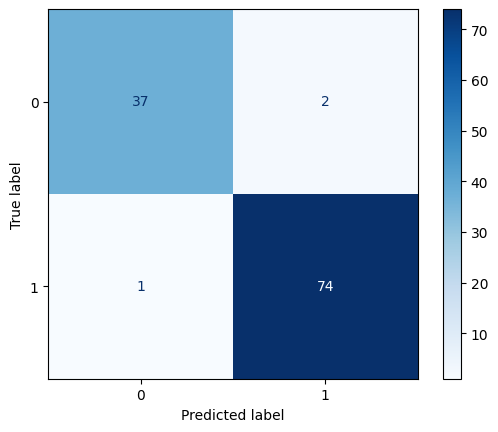

Confusion matrix for SVM models with linear kernel

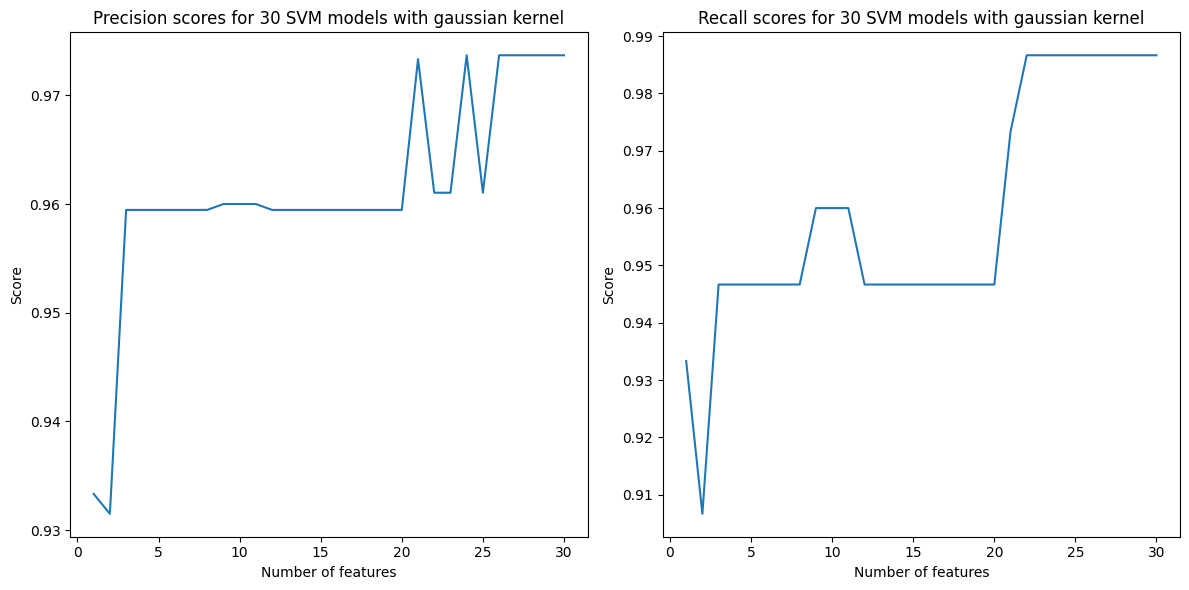

In [7]:
import sklearn.svm as svm
print("Confusion matrix for SVM model with linear kernel")
C = 1
model = svm.SVC(kernel='linear',C=C).fit(X_train, Y_train)
#Predict the response for test dataset
Y_pred = model.predict(X_test)
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=None)
plt.show()

print("Confusion matrix for SVM models with linear kernel")
recall_score_arr = []
precision_score_arr = []

for i in range(1, 31):
    model = svm.SVC(kernel='linear',C=C).fit(X_train[:,:i], Y_train)
    Y_pred = model.predict(X_test[:,:i])
    recall_score_arr.append(recall_score(Y_test, Y_pred))
    precision_score_arr.append(precision_score(Y_test, Y_pred))

plot_precision_and_recall(precision_score_arr, recall_score_arr)

#Use the Gaussian

Confusion matrix for SVM model with gaussian kernel

Precision: 0.948051948051948

Recall: 0.9733333333333334

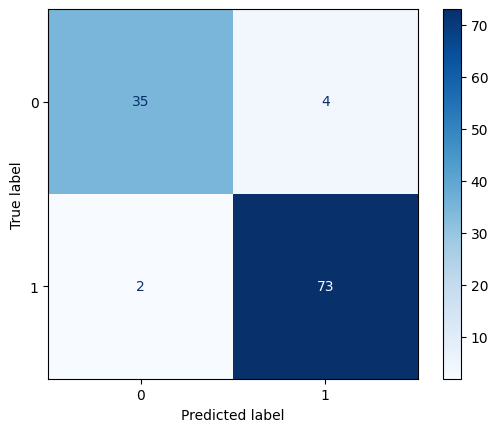

Confusion matrix for SVM models with gaussian kernel

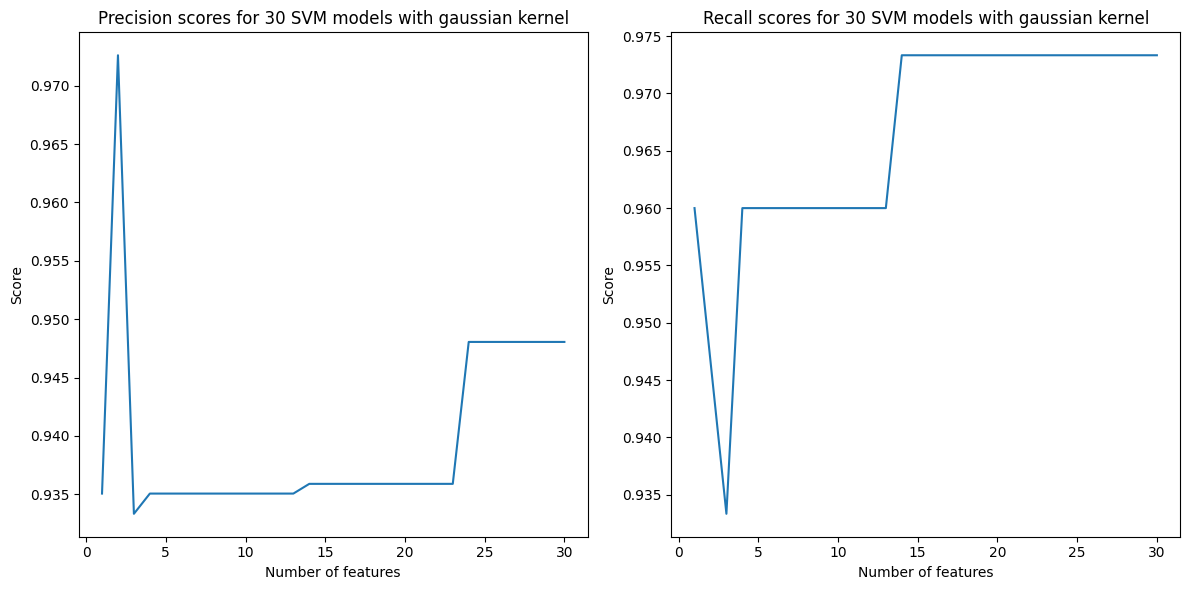

In [8]:
import sklearn.svm as svm

print("Confusion matrix for SVM model with gaussian kernel")
C = 1
model = svm.SVC(kernel='rbf', C=C).fit(X_train, Y_train)
# Predict the response for test dataset
Y_pred = model.predict(X_test)
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

disp = plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, normalize=None)
plt.show()

print("Confusion matrix for SVM models with gaussian kernel")
recall_score_arr = []
precision_score_arr = []

for i in range(1, 31):
    model = svm.SVC(kernel='rbf', C=C).fit(X_train[:, :i], Y_train)
    Y_pred = model.predict(X_test[:, :i])
    recall_score_arr.append(recall_score(Y_test, Y_pred))
    precision_score_arr.append(precision_score(Y_test, Y_pred))


plot_precision_and_recall(precision_score_arr, recall_score_arr)

# Boston Housing Price

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

MSE: 48.37326795942244

Accuracy: 0.263413922064648

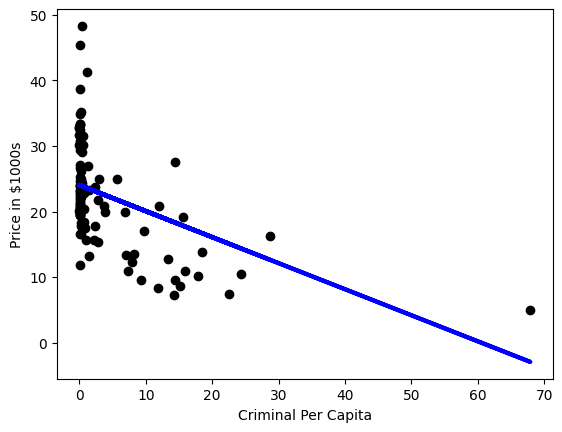

In [9]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# Load the Boston Housing Price dataset
X, Y = load_boston(return_X_y=True)
print(load_boston().feature_names)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE)

# Train the model
model_1_feature = LinearRegression().fit(X_train[:, 0].reshape(-1, 1), Y_train)
Y_pred_1_feature = model_1_feature.predict(X_test[:, 0].reshape(-1, 1))

print("MSE:", np.mean((Y_pred_1_feature - Y_test) ** 2))
print("Accuracy:", model_1_feature.score(X_test[:, 0].reshape(-1, 1), Y_test))
plt.scatter(X_test[:, 0], Y_test, color='black')
plt.plot(X_test[:, 0], Y_pred_1_feature, color='blue', linewidth=3)
plt.xlabel('Criminal Per Capita')
plt.ylabel('Price in $1000s')
plt.show()



In [10]:
"""
Create a Multiple Linear Regression (MLR) model using all the 13 features. Print the accuracy
(mse) and compare it that obtained in (i).
"""
# Train the model
model_all_features = LinearRegression().fit(X_train, Y_train)
Y_pred_all_features = model_all_features.predict(X_test)

print("MSE all features:", np.mean((Y_pred_all_features - Y_test) ** 2))
print("MSE first features:", np.mean((Y_pred_1_feature - Y_test) ** 2))
print("MSE of 1 feature is more than all features, so all features are better")

MSE all features: 18.395032996550494

MSE first features: 48.37326795942244

MSE of 1 feature is more than all features, so all features are better

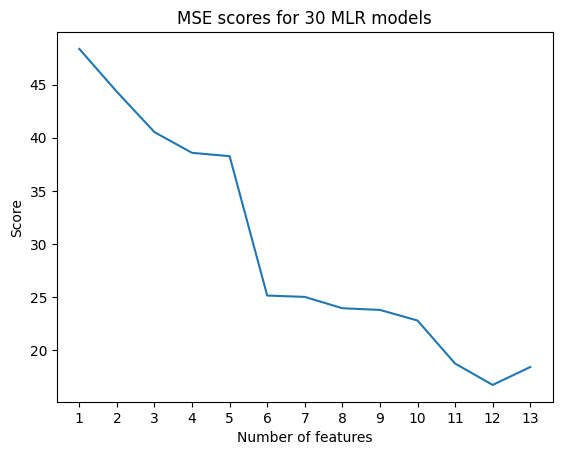

In [12]:
mse_score_arr = []

for i in range(1, 14):
    model = LinearRegression().fit(X_train[:, :i], Y_train)
    Y_pred = model.predict(X_test[:, :i])
    mse_score_arr.append(np.mean((Y_pred - Y_test) ** 2))

plt.plot(np.arange(1, 14), mse_score_arr, label="MSE")
plt.xticks(np.arange(1, 14))
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.title("MSE scores for 30 MLR models")
plt.show()